In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import (train_test_split,
                                     cross_val_score, KFold, GridSearchCV)
from sklearn.metrics import (accuracy_score, precision_score, recall_score, confusion_matrix)
from imutils import paths
import cv2
import os
import numpy as np
import argparse
import matplotlib.pyplot as plt
import pandas as pd
import requests
import zipfile
import io
import os
import seaborn as sns

In [3]:
url = "https://github.com/10sajan10/CS6830_Project7/raw/main/sateliteimage.zip"

response = requests.get(url)
if response.status_code == 200:
    print("Download successful!")
    
    with zipfile.ZipFile(io.BytesIO(response.content)) as zip_ref:
        zip_ref.extractall()
        print(f"Files extracted")

Download successful!
Files extracted


In [4]:
def extract_color_stats(image):

    B, G, R = cv2.split(image)

    mean_R, mean_G, mean_B = np.mean(R), np.mean(G), np.mean(B)
    std_R, std_G, std_B = np.std(R), np.std(G), np.std(B)

    features = [mean_R, mean_G, mean_B, std_R, std_G, std_B]

    return features

In [5]:
imagePaths = paths.list_images(r'sateliteimage/')
data = []
labels_str = []
for imagePath in imagePaths:
    image = cv2.imread(imagePath)
    features = extract_color_stats(image)
    data.append(features)

    # extract the class label from the file path and update the labels list
    label = imagePath.split(os.path.sep)[-2].split("/")[1]
    labels_str.append(label)

le = LabelEncoder()
labels = le.fit_transform(labels_str)

In [6]:
labels_str

['cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',
 'cloudy',

In [7]:
df = pd.DataFrame(data, columns=['mean_R', 'mean_G', 'mean_B', 'std_R', 'std_G', 'std_B'])
df['label'] = labels_str

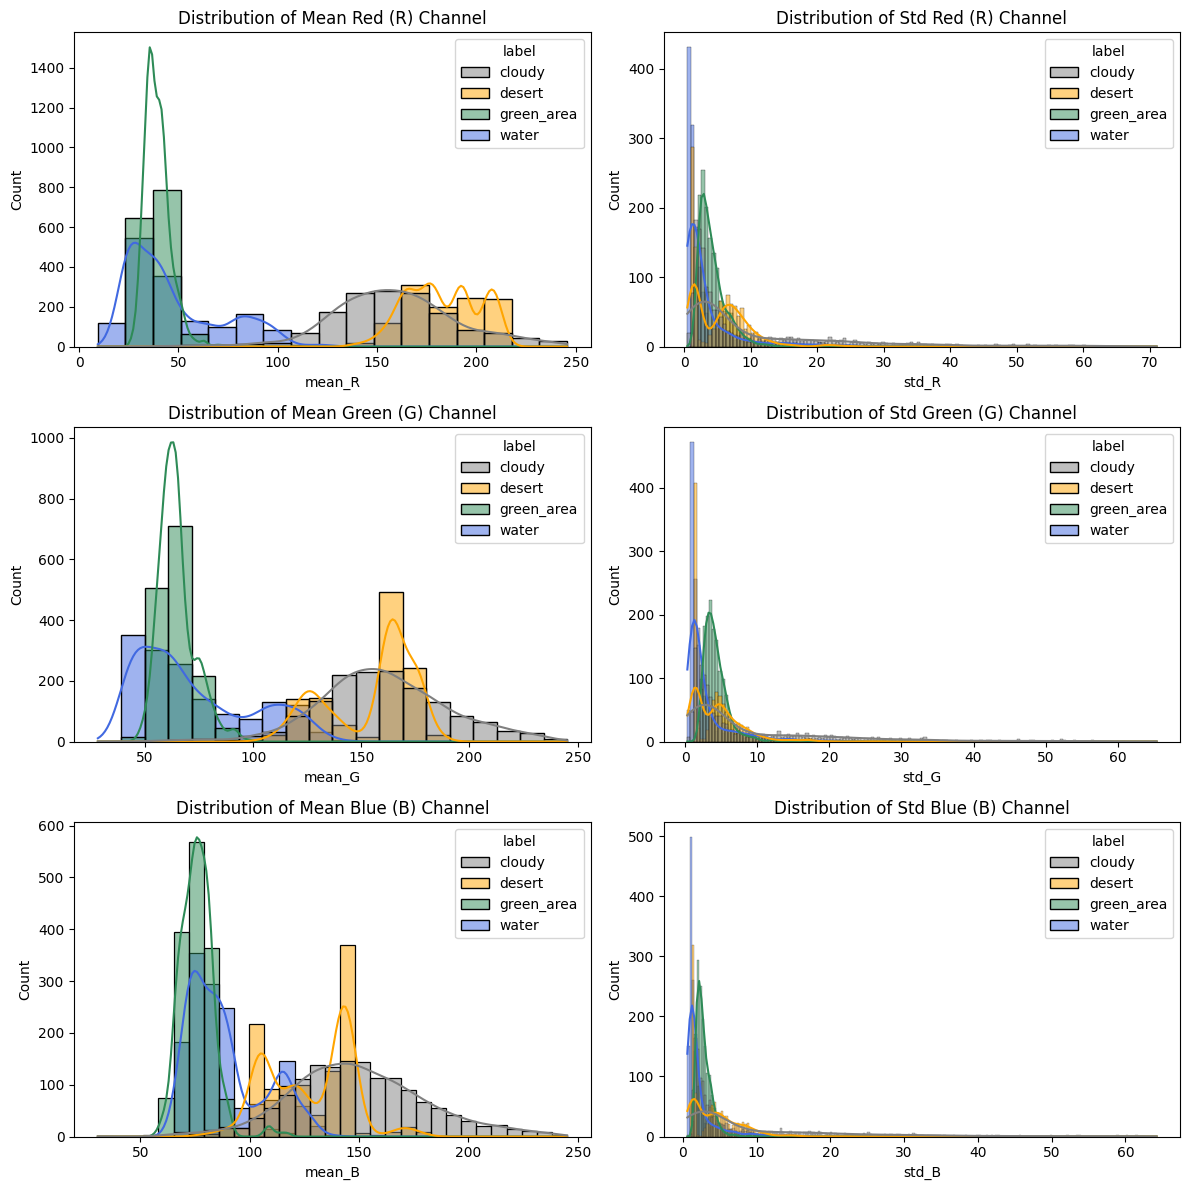

In [12]:
plt.figure(figsize=(12, 12))
color_mapping = {
    'cloudy': 'gray',
    'water': 'royalblue',
    'green_area': 'seagreen',
    'desert': 'orange'
}
# Plot for mean(R)
plt.subplot(3, 2, 1)
sns.histplot(data=df, x='mean_R', hue='label', palette=color_mapping, kde=True)
plt.title('Distribution of Mean Red (R) Channel')

# Plot for std(R)
plt.subplot(3, 2, 2)
sns.histplot(data=df, x='std_R', hue='label',palette=color_mapping, kde=True)
plt.title('Distribution of Std Red (R) Channel')

# Plot for mean(G)
plt.subplot(3, 2, 3)
sns.histplot(data=df, x='mean_G', hue='label',palette=color_mapping, kde=True)
plt.title('Distribution of Mean Green (G) Channel')

# Plot for std(G)
plt.subplot(3, 2, 4)
sns.histplot(data=df, x='std_G', hue='label',palette=color_mapping, kde=True)
plt.title('Distribution of Std Green (G) Channel')

# Plot for mean(B)
plt.subplot(3, 2, 5)
sns.histplot(data=df, x='mean_B', hue='label',palette=color_mapping, kde=True)
plt.title('Distribution of Mean Blue (B) Channel')

# Plot for std(B)
plt.subplot(3, 2, 6)
sns.histplot(data=df, x='std_B', hue='label',palette=color_mapping, kde=True)
plt.title('Distribution of Std Blue (B) Channel')

plt.tight_layout()
plt.show()

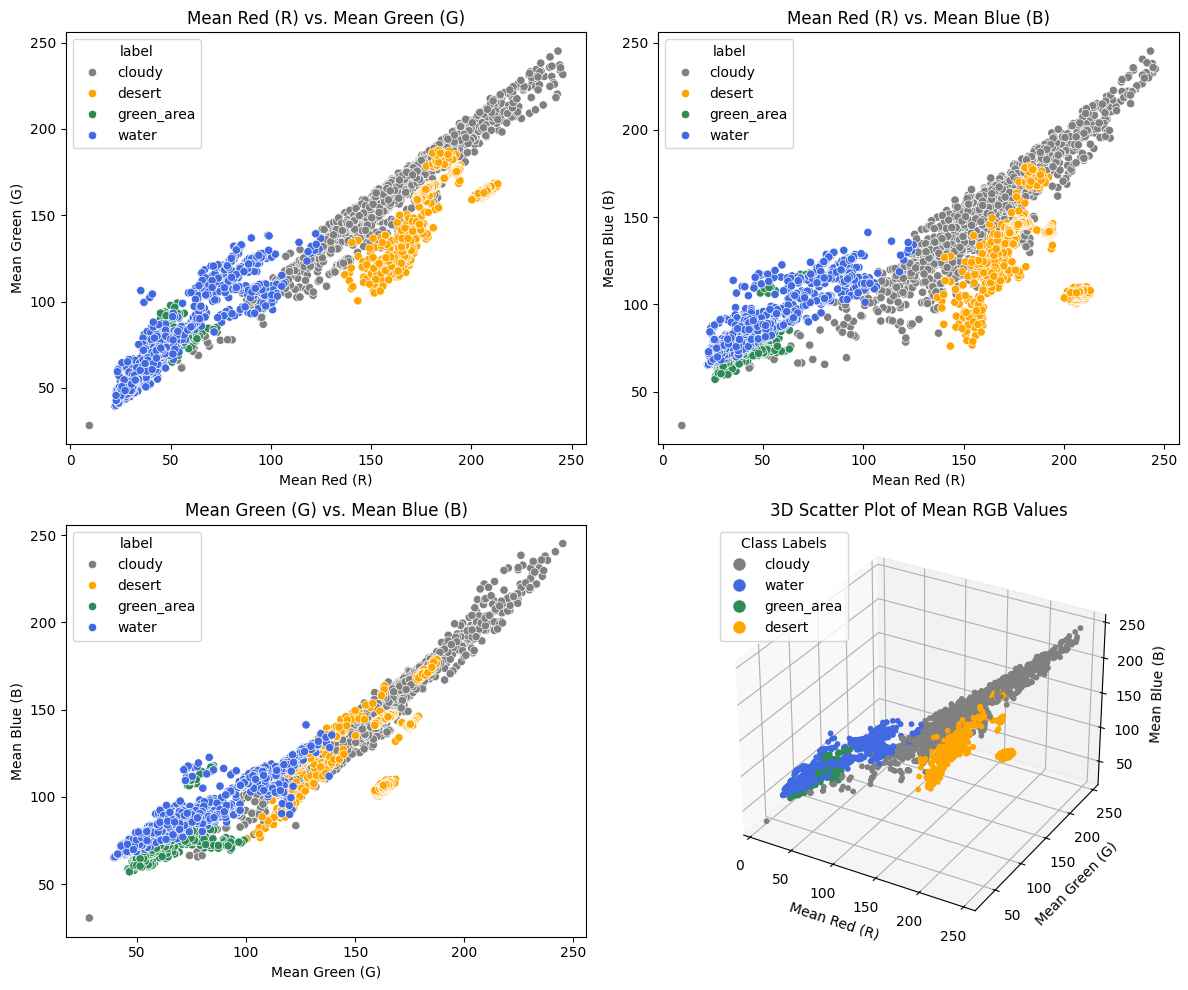

In [13]:
plt.figure(figsize=(12, 10))
color_mapping = {
    'cloudy': 'gray',
    'water': 'royalblue',
    'green_area': 'seagreen',
    'desert': 'orange'
}
df['color'] = df['label'].map(color_mapping)

# Plot for mean_R vs mean_G
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='mean_R', y='mean_G', hue='label', palette=color_mapping)
plt.title('Mean Red (R) vs. Mean Green (G)')
plt.xlabel('Mean Red (R)')
plt.ylabel('Mean Green (G)')

# Plot for mean_R vs mean_B
plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='mean_R', y='mean_B', hue='label', palette=color_mapping)
plt.title('Mean Red (R) vs. Mean Blue (B)')
plt.xlabel('Mean Red (R)')
plt.ylabel('Mean Blue (B)')

# Plot for mean_G vs mean_B
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='mean_G', y='mean_B', hue='label', palette=color_mapping)
plt.title('Mean Green (G) vs. Mean Blue (B)')
plt.xlabel('Mean Green (G)')
plt.ylabel('Mean Blue (B)')


ax = plt.subplot(2, 2, 4, projection='3d')  # Set the 3D projection here

# Scatter plot with specified colors
ax.scatter(df['mean_R'], df['mean_G'], df['mean_B'], 
           color=df['color'],  # Use the color from the mapping
           s=10,  # Size of points
           alpha=1)  # Transparency

# Labels
ax.set_xlabel('Mean Red (R)')
ax.set_ylabel('Mean Green (G)')
ax.set_zlabel('Mean Blue (B)')
ax.set_title('3D Scatter Plot of Mean RGB Values')

# Add legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_mapping[label], markersize=10) 
           for label in color_mapping]
ax.legend(handles, color_mapping.keys(), title="Class Labels")

plt.tight_layout()
plt.show()

In [14]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2, random_state=42)
trainscore = {}
test_accuracy = {}
test_precision = {}
test_recall = {}
scaler = StandardScaler()
trainX = scaler.fit_transform(trainX)
testX = scaler.transform(testX)

cv = KFold(n_splits=10, random_state=1, shuffle=True)
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)
scores = cross_val_score(log_reg, trainX, trainY, cv=cv)
trainscore['Logistic_Regression'] = scores.mean()

In [15]:
import time
start_time = time.time()
log_reg.fit(trainX, trainY)
end_time = time.time()

In [16]:
print(f'Runtime = {end_time-start_time}')

Runtime = 0.15944528579711914


Confusion Matrix of Logistic Regression:
[[299  21   8   0]
 [ 10 217   0   0]
 [  0   0 220  64]
 [  2   0  62 224]]


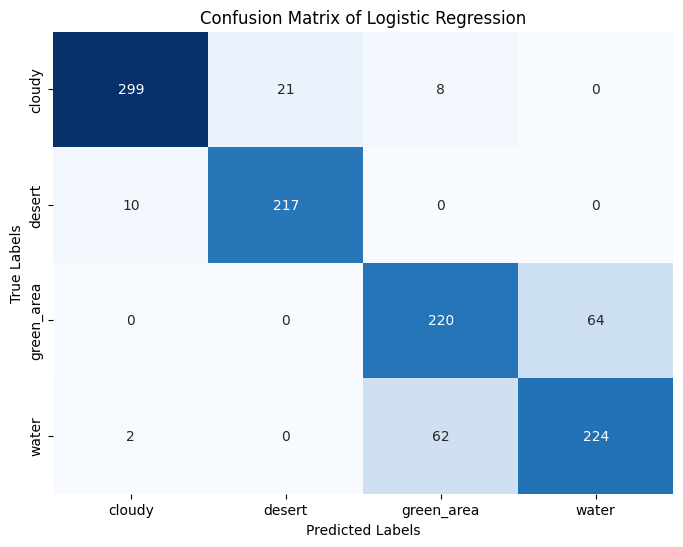

In [17]:
predicted_test_labels = log_reg.predict(testX)
conf_matrix = confusion_matrix(testY, predicted_test_labels)
print("Confusion Matrix of Logistic Regression:")
print(conf_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix of Logistic Regression")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [19]:
test_accuracy['Logistic_Regression'] = accuracy_score(testY, predicted_test_labels)
test_precision['Logistic_Regression'] = precision_score(testY, predicted_test_labels, average='weighted')
test_recall['Logistic_Regression'] = recall_score(testY, predicted_test_labels, average='weighted')

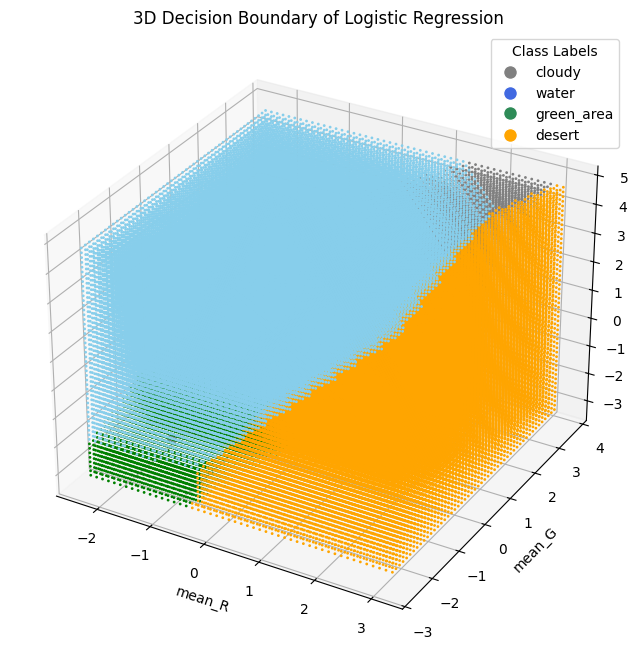

In [20]:
label_mapping ={0:'gray',1:'orange',2:'green',3:'skyblue'}
# Fit the logistic regression model
log_reg = LogisticRegression(solver='lbfgs', max_iter=10000, random_state=42)
log_reg.fit(trainX[:,:3], trainY)

# Create a mesh grid for the two features (let's say the first two features)
x_min, x_max = trainX[:, 0].min() - 1, trainX[:, 0].max() + 1
y_min, y_max = trainX[:, 1].min() - 1, trainX[:, 1].max() + 1
z_min, z_max = trainX[:, 2].min() - 1, trainX[:, 2].max() + 1
xx, yy, zz = np.meshgrid(np.linspace(x_min, x_max, 50),
                     np.linspace(y_min, y_max, 50), np.linspace(z_min, z_max, 50))
data_mesh =np.c_[xx.ravel(), yy.ravel(), zz.ravel()]
# Predict using the mesh grid, fixing the third feature to its mean value
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel(), zz.ravel()])
# Z = Z.reshape(xx.shape)

# Create a 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the decision boundary
# ax.plot_surface(xx, yy, zz, Z, alpha=0.5, cmap='coolwarm', edgecolor='none')

# Scatter plot for the original training data points
ax.scatter(trainX[:, 0], trainX[:, 1], trainX[:, 2], 
           c=[label_mapping[label] for label in trainY], 
           alpha=1, s=40, label='Training Data')
ax.scatter(data_mesh[:, 0], data_mesh[:, 1], data_mesh[:, 2], c=pd.Series(Z).apply(lambda x: label_mapping[x]), alpha = 1, s=1,)
# Labels and title
ax.set_xlabel('mean_R')
ax.set_ylabel('mean_G')
ax.set_zlabel('mean_B')
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_mapping[label], markersize=10) 
           for label in color_mapping]
ax.legend(handles, color_mapping.keys(), title="Class Labels")
ax.set_title('3D Decision Boundary of Logistic Regression')
plt.show()

In [23]:
svc = SVC(random_state=42)
param_grid = [
    {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
    {'C': [0.1, 1, 10, 100, 1000], 'degree': [1, 2, 3], 'kernel': ['poly']}]
grid = GridSearchCV(svc, param_grid, refit=True, verbose=3)
grid.fit(trainX, trainY)
print(grid.best_params_)
print(grid.best_score_)
trainscore['SVC'] = grid.best_score_

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.920 total time=   0.4s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.928 total time=   0.3s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.931 total time=   0.3s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.913 total time=   0.3s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.918 total time=   0.3s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.887 total time=   0.5s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.901 total time=   0.5s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.900 total time=   0.5s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.883 total time=   0.5s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.888 total time=   0.5s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.634 total time=   0.8s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

Confusion Matrix of SVC:


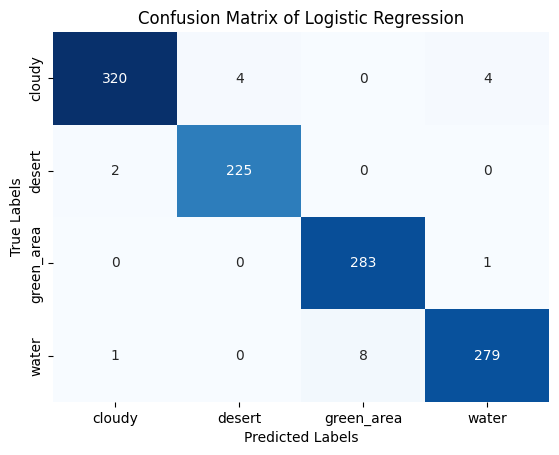

In [26]:
predicted_labels = grid.predict(testX)
test_accuracy['SVC'] = accuracy_score(testY, predicted_labels)
test_precision['SVC'] = precision_score(testY, predicted_labels, average='weighted')
test_recall['SVC'] = recall_score(testY, predicted_labels, average='weighted')
print("Confusion Matrix of SVC:")
conf_matrix=confusion_matrix(testY, predicted_labels)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix of Logistic Regression")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

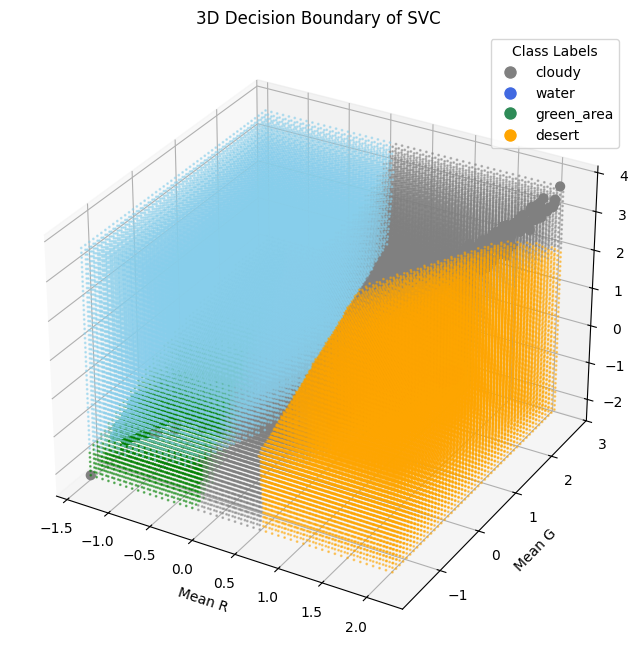

In [28]:
label_mapping = {0: 'gray', 1: 'orange', 2: 'green', 3: 'skyblue'}

svc = SVC(C=10, gamma=0.01, kernel='rbf', random_state=42)
svc.fit(trainX[:,:3], trainY)

x_min, x_max = trainX[:, 0].min(), trainX[:, 0].max()
y_min, y_max = trainX[:, 1].min() , trainX[:, 1].max()
z_min, z_max = trainX[:, 2].min(), trainX[:, 2].max()

xx, yy, zz = np.meshgrid(
    np.linspace(x_min, x_max, 50),
    np.linspace(y_min, y_max, 50),
    np.linspace(z_min, z_max, 50)
)

data_mesh = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]
Z = svc.predict((data_mesh))  # Transform the mesh grid for predictions

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the original training data points
ax.scatter(trainX[:, 0], trainX[:, 1], trainX[:, 2], 
           c=[label_mapping[label] for label in trainY], 
           alpha=1, s=40, label='Training Data')

# Visualize the decision boundary
ax.scatter(data_mesh[:, 0], data_mesh[:, 1], data_mesh[:, 2], 
           c=[label_mapping[label] for label in Z], 
           alpha=0.5, s=1)

# Labels and title
ax.set_xlabel('Mean R')
ax.set_ylabel('Mean G')
ax.set_zlabel('Mean B')
ax.set_title('3D Decision Boundary of SVC')

# Create a legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_mapping[label], markersize=10) 
           for label in color_mapping]
ax.legend(handles, color_mapping.keys(), title="Class Labels")

plt.show()

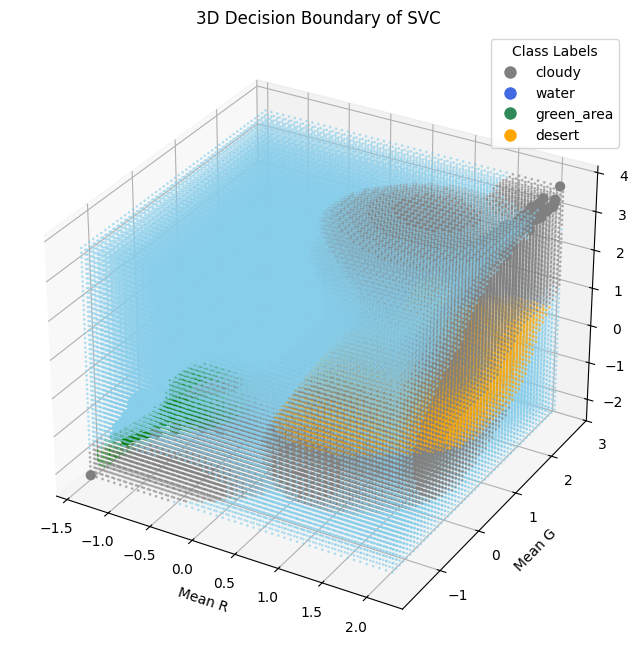

In [29]:
label_mapping = {0: 'gray', 1: 'orange', 2: 'green', 3: 'skyblue'}

svc = SVC(C=1000, gamma=1, kernel='rbf', random_state=42)
svc.fit(trainX[:,:3], trainY)

x_min, x_max = trainX[:, 0].min(), trainX[:, 0].max()
y_min, y_max = trainX[:, 1].min() , trainX[:, 1].max()
z_min, z_max = trainX[:, 2].min(), trainX[:, 2].max()

xx, yy, zz = np.meshgrid(
    np.linspace(x_min, x_max, 50),
    np.linspace(y_min, y_max, 50),
    np.linspace(z_min, z_max, 50)
)

data_mesh = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]
Z = svc.predict((data_mesh))  # Transform the mesh grid for predictions

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the original training data points
ax.scatter(trainX[:, 0], trainX[:, 1], trainX[:, 2], 
           c=[label_mapping[label] for label in trainY], 
           alpha=1, s=40, label='Training Data')

# Visualize the decision boundary
ax.scatter(data_mesh[:, 0], data_mesh[:, 1], data_mesh[:, 2], 
           c=[label_mapping[label] for label in Z], 
           alpha=0.5, s=1)

# Labels and title
ax.set_xlabel('Mean R')
ax.set_ylabel('Mean G')
ax.set_zlabel('Mean B')
ax.set_title('3D Decision Boundary of SVC')

# Create a legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_mapping[label], markersize=10) 
           for label in color_mapping]
ax.legend(handles, color_mapping.keys(), title="Class Labels")

plt.show()

In [30]:
from sklearn.svm import LinearSVC
linear_svc = LinearSVC(random_state=42)

# Define the parameter grid for LinearSVC, only including the 'C' parameter
param_grid = [{'C': [0.1, 1, 10, 100, 1000]}]

# Set up GridSearchCV
grid = GridSearchCV(linear_svc, param_grid, refit=True, verbose=3)

# Fit the model to the training data
grid.fit(trainX, trainY)

# Output the best parameters and best score
print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

# Store the best score in trainscore
trainscore['Linear_SVC'] = grid.best_score_

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END .............................C=0.1;, score=0.826 total time=   0.0s
[CV 2/5] END .............................C=0.1;, score=0.848 total time=   0.0s
[CV 3/5] END .............................C=0.1;, score=0.856 total time=   0.0s
[CV 4/5] END .............................C=0.1;, score=0.841 total time=   0.0s
[CV 5/5] END .............................C=0.1;, score=0.829 total time=   0.0s
[CV 1/5] END ...............................C=1;, score=0.827 total time=   0.0s
[CV 2/5] END ...............................C=1;, score=0.851 total time=   0.0s
[CV 3/5] END ...............................C=1;, score=0.861 total time=   0.0s
[CV 4/5] END ...............................C=1;, score=0.840 total time=   0.0s
[CV 5/5] END ...............................C=1;, score=0.829 total time=   0.0s
[CV 1/5] END ..............................C=10;, score=0.830 total time=   0.0s
[CV 2/5] END ..............................C=10;,

Confusion Matrix of Linear SVC:


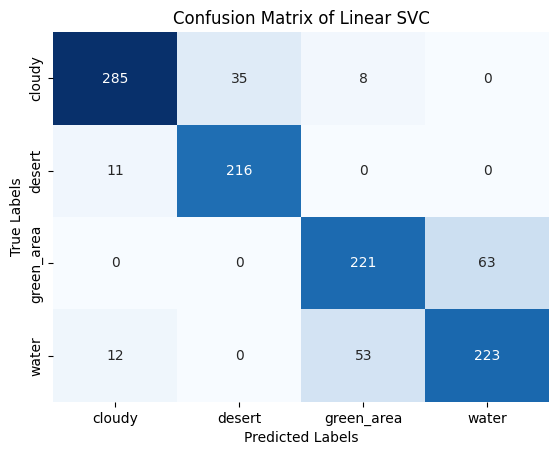

In [31]:
predicted_labels = grid.predict(testX)
test_accuracy['Linear_SVC'] = accuracy_score(testY, predicted_labels)
test_precision['Linear_SVC'] = precision_score(testY, predicted_labels, average='weighted')
test_recall['Linear_SVC'] = recall_score(testY, predicted_labels, average='weighted')
print("Confusion Matrix of Linear SVC:")
conf_matrix=confusion_matrix(testY, predicted_labels)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix of Linear SVC")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

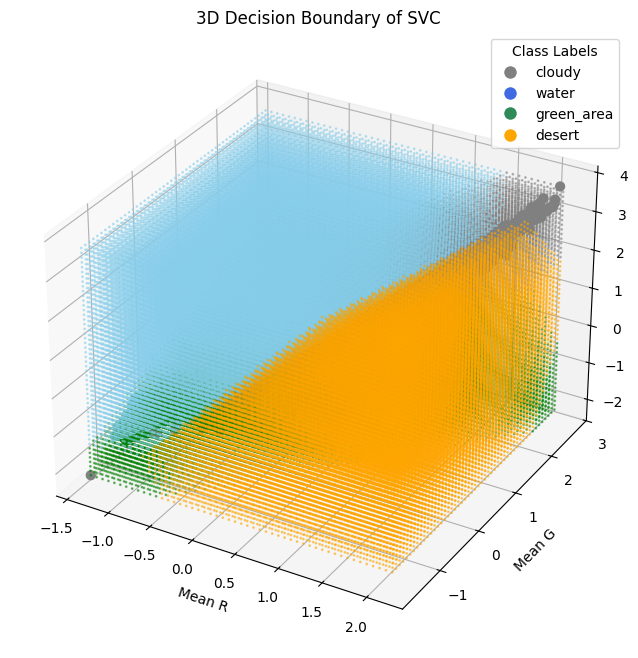

In [32]:
label_mapping = {0: 'gray', 1: 'orange', 2: 'green', 3: 'skyblue'}

lin_svc = LinearSVC(C=10, random_state=42)
lin_svc.fit(trainX[:,:3], trainY)

x_min, x_max = trainX[:, 0].min(), trainX[:, 0].max()
y_min, y_max = trainX[:, 1].min() , trainX[:, 1].max()
z_min, z_max = trainX[:, 2].min(), trainX[:, 2].max()

xx, yy, zz = np.meshgrid(
    np.linspace(x_min, x_max, 50),
    np.linspace(y_min, y_max, 50),
    np.linspace(z_min, z_max, 50)
)

data_mesh = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]
Z = lin_svc.predict((data_mesh))  # Transform the mesh grid for predictions

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the original training data points
ax.scatter(trainX[:, 0], trainX[:, 1], trainX[:, 2], 
           c=[label_mapping[label] for label in trainY], 
           alpha=1, s=40, label='Training Data')

# Visualize the decision boundary
ax.scatter(data_mesh[:, 0], data_mesh[:, 1], data_mesh[:, 2], 
           c=[label_mapping[label] for label in Z], 
           alpha=0.5, s=1)

# Labels and title
ax.set_xlabel('Mean R')
ax.set_ylabel('Mean G')
ax.set_zlabel('Mean B')
ax.set_title('3D Decision Boundary of SVC')

# Create a legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_mapping[label], markersize=10) 
           for label in color_mapping]
ax.legend(handles, color_mapping.keys(), title="Class Labels")

plt.show()

In [33]:
df_scores = pd.DataFrame({'Train Accuracy': trainscore, 'Test Accuracy': test_accuracy, 
                          'Test Precision': test_precision,'Test Recall': test_recall})
df_scores

,Train Accuracy,Test Accuracy,Test Precision,Test Recall
Logistic_Regression,0.849018,0.851819,0.853383,0.851819
SVC,0.976466,0.982254,0.982352,0.982254
Linear_SVC,0.844135,0.838509,0.839379,0.838509


### Diabetes Dataset

## Which variables are predictive of the target variable?

In [34]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Load your dataset
df = pd.read_csv('diabetes.csv')

# Prepare features and target
X = df[['Glucose', 'BloodPressure', 'Pregnancies', 'BMI']]
y = df['Outcome']

# Fit logistic regression model using statsmodels
X_with_const = sm.add_constant(X)
logit_model = sm.Logit(y, X_with_const).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.480748
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      763
Method:                           MLE   Df Model:                            4
Date:                Mon, 04 Nov 2024   Pseudo R-squ.:                  0.2567
Time:                        13:26:04   Log-Likelihood:                -369.21
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 5.302e-54
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -7.6574      0.658    -11.642      0.000      -8.947      -6.368
Glucose           0.

## What do plots of selected pairs of variables look like? Where is the decision boundary in those plots?

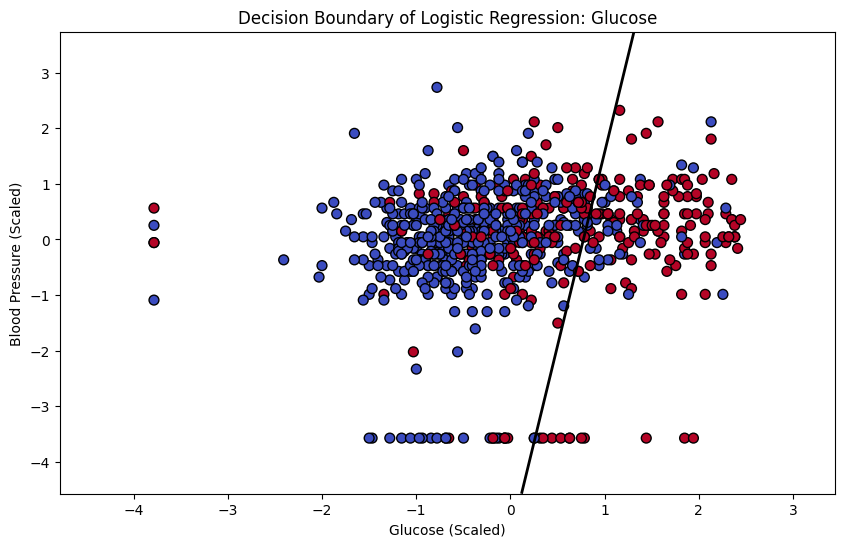

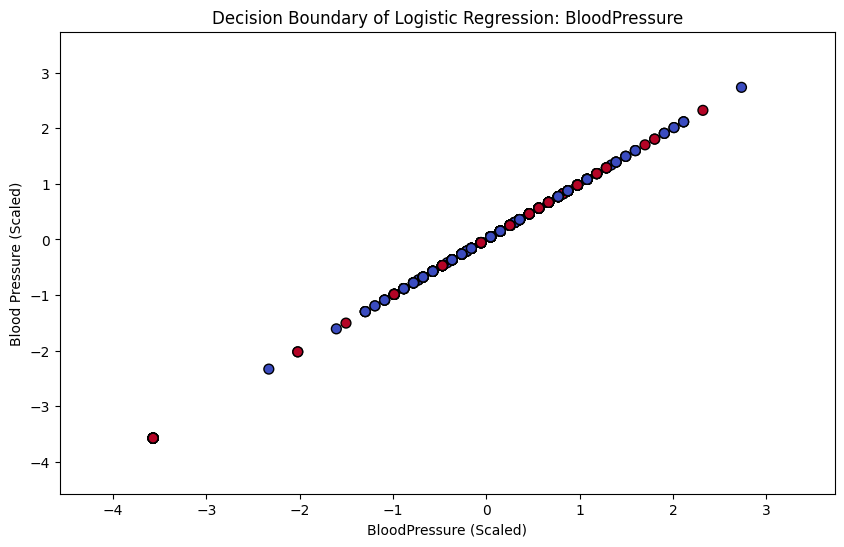

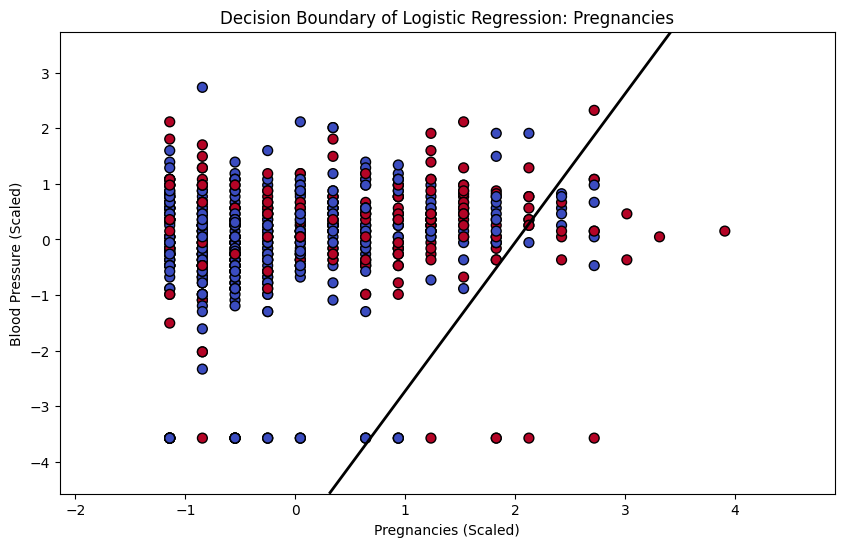

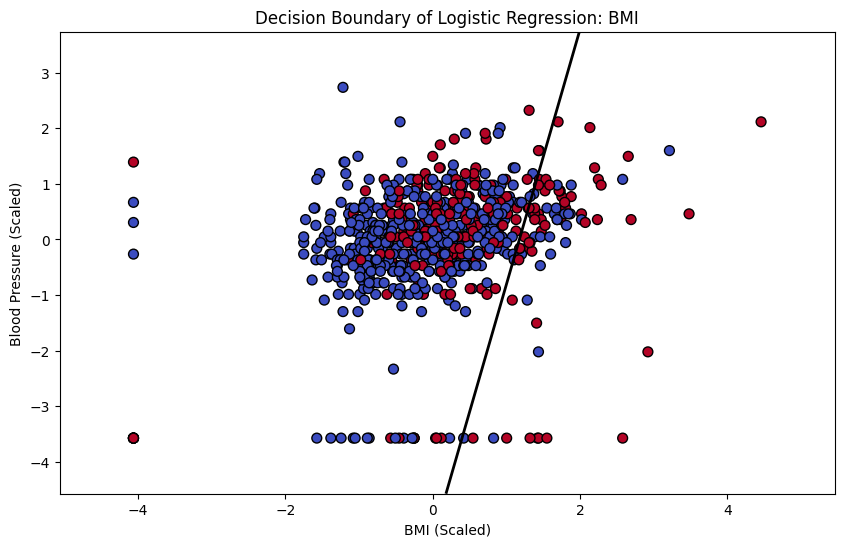

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=0)

# Train logistic regression using sklearn
logisticRegr = LogisticRegression(max_iter=1000)
logisticRegr.fit(x_train, y_train)

# Define a function to plot the decision boundary for a given feature
def plot_decision_boundary(feature_index, feature_name):
    # Get the min and max for the feature and Blood Pressure
    x_min, x_max = X_scaled[:, feature_index].min() - 1, X_scaled[:, feature_index].max() + 1
    y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1  # BloodPressure is at index 1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50), np.linspace(y_min, y_max, 50))

    # Prepare input data for predict_proba
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    grid_points_full = np.zeros((grid_points.shape[0], X_scaled.shape[1]))
    grid_points_full[:, feature_index] = grid_points[:, 0]  # Set the selected feature
    grid_points_full[:, 1] = grid_points[:, 1]              # Set Blood Pressure

    # Predict probabilities
    probs_logistic = logisticRegr.predict_proba(grid_points_full)[:, 1]
    probs_logistic = probs_logistic.reshape(xx.shape)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(X_scaled[:, feature_index], X_scaled[:, 1], c=y, cmap='coolwarm', edgecolors='k', s=50)
    plt.contour(xx, yy, probs_logistic, levels=[0.5], linewidths=2, colors='black')
    plt.xlabel(f'{feature_name} (Scaled)')
    plt.ylabel('Blood Pressure (Scaled)')
    plt.title(f'Decision Boundary of Logistic Regression: {feature_name}')
    plt.show()

# List of features and their names
features = [(0, 'Glucose'), (1, 'BloodPressure'), (2, 'Pregnancies'), (3, 'BMI')]

# Generate plots for each feature
for feature_index, feature_name in features:
    plot_decision_boundary(feature_index, feature_name)

## Can logistic regression or a linear SVM predict well?

In [12]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Logistic Regression
logistic_cv_scores = cross_val_score(LogisticRegression(max_iter=1000), X_scaled, y, cv=5)
print(f"Logistic Regression CV Accuracy: {logistic_cv_scores.mean():.2f}")

# Cross-validation for Linear SVM
svm_cv_scores = cross_val_score(LinearSVC(max_iter=1000), X_scaled, y, cv=5)
print(f"Linear SVM CV Accuracy: {svm_cv_scores.mean():.2f}")


Logistic Regression CV Accuracy: 0.77
Linear SVM CV Accuracy: 0.77


## Is there a difference between the polynomial and RBF SVMs?

In [13]:
from sklearn.svm import SVC

# Train RBF SVM
rbf_svm_model = SVC(kernel='rbf', probability=True)
rbf_svm_model.fit(x_train, y_train)
y_pred_rbf = rbf_svm_model.predict(x_test)

# Train Polynomial SVM
poly_svm_model = SVC(kernel='poly', degree=3, probability=True)
poly_svm_model.fit(x_train, y_train)
y_pred_poly = poly_svm_model.predict(x_test)

# Compare performance
for model_name, y_pred in zip(['RBF SVM', 'Polynomial SVM'], [y_pred_rbf, y_pred_poly]):
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} - Accuracy: {accuracy:.2f}")


RBF SVM - Accuracy: 0.79
Polynomial SVM - Accuracy: 0.75


## What effect does changing the class_weight in an SVM have on your data? How might this be important for this data?

In [14]:
# Train SVM with class_weight
balanced_svm_model = SVC(class_weight='balanced')
balanced_svm_model.fit(x_train, y_train)
y_pred_balanced = balanced_svm_model.predict(x_test)

# Evaluate model
accuracy_balanced = accuracy_score(y_test, y_pred_balanced)
print(f"Balanced SVM - Accuracy: {accuracy_balanced:.2f}")

# Compare with previous SVM
print(f"Original SVM - Accuracy: {accuracy:.2f}")


Balanced SVM - Accuracy: 0.76
Original SVM - Accuracy: 0.75


## Is there a difference in runtime performance?

In [15]:
import time

# Measure runtime for Logistic Regression
start_time = time.time()
logisticRegr.fit(x_train, y_train)
logistic_runtime = time.time() - start_time

# Measure runtime for SVM
start_time = time.time()
svm_model.fit(x_train, y_train)
svm_runtime = time.time() - start_time

print(f"Logistic Regression Runtime: {logistic_runtime:.4f} seconds")
print(f"SVM Runtime: {svm_runtime:.4f} seconds")


Logistic Regression Runtime: 0.0103 seconds
SVM Runtime: 0.0052 seconds


## Logistic regression and LinearSVC use one-vs-rest (OVR) for multi-class classification. SVC uses one-vs-one (OVO). Where n is the number of classes, OVR learns n models, whereas OVO learns n(n-1)/2 (n choose 2) models. What effect does this have on performance?

In [16]:
# For multi-class, we can use SVC with OVO and OVR
from sklearn.metrics import accuracy_score

# Train OVR SVC
ovr_svc_model = SVC(decision_function_shape='ovr')
ovr_svc_model.fit(x_train, y_train)
y_pred_ovr = ovr_svc_model.predict(x_test)
accuracy_ovr = accuracy_score(y_test, y_pred_ovr)

# Train OVO SVC
ovo_svc_model = SVC(decision_function_shape='ovo')
ovo_svc_model.fit(x_train, y_train)
y_pred_ovo = ovo_svc_model.predict(x_test)
accuracy_ovo = accuracy_score(y_test, y_pred_ovo)

print(f"OVR SVC Accuracy: {accuracy_ovr:.2f}")
print(f"OVO SVC Accuracy: {accuracy_ovo:.2f}")


OVR SVC Accuracy: 0.79
OVO SVC Accuracy: 0.79
